In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the data
df = pd.read_csv('boston.csv', index_col = 0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
'''
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.

.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
'''

In [ ]:
# Seperating the input and output features
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Searching for optimal values of K

# list the scores from k_range
k_range = range(1, 26)
k_scores = []

# Looping through the values
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.r2_score(y_test, y_pred)
    k_scores.append(score)

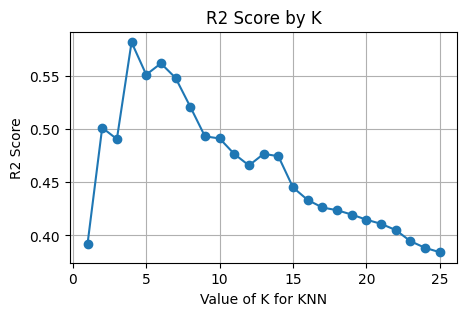

In [ ]:
# Plotting the value of k for kNN
plt.figure(figsize = (5, 3))
plt.plot(k_range, k_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('R2 Score')
plt.title('R2 Score by K')
plt.grid()
plt.show()

In [ ]:
# k = 4 is the best value available

In [ ]:
# Optimum Model
knn = KNeighborsRegressor(n_neighbors = 4)

# Fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
# Taking predictions from the model
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
# Evaluating the model
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_test_pred), 2))

Training R2 Score : 0.74
Testing R2 Score : 0.58


In [ ]:
# From the above output, we can say that this is clearly a overfitted model.

In [ ]:
# Homework -> Try to preprocess the data taking into account all the assumptions of the model